In [7]:
import sys
# !{sys.executable} -m pip install pyfolio
!{sys.executable} -m pip install pyfolio-reloaded

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 3.3 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.3-cp39-cp39-macosx_10_9_x86_64.whl size=253578 sha256=6a6f4897a7baf89b303e231869ca498568f2fd449cb94538dbcba5a3dc6c3be4
  Stored in directory: /Users/tomasz/Library/Caches/pip/wheels/a7/64/49/81f05b55b5fcafe2ea6316aac808b15228715abc3d2632a240
Successfully built peewee
  Attempting uninstall: peewee
    Found existing installation: peewee 3.17.8
    Uninstalling peewee-3.17.8:
      Successfully uninstalled peewee-3.17.8
  Attempting uninstall: numpy
    Fou

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyfolio as pf
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [34]:
amazon = pd.read_csv('amzn.us.txt', index_col=0)
amazon.index = pd.to_datetime(amazon.index)

In [38]:
ret = amazon.Close.pct_change().dropna()

In [59]:
ret

Date
1997-05-19   -0.011561
1997-05-20   -0.040936
1997-05-21   -0.128049
1997-05-22   -0.020979
1997-05-23    0.071429
                ...   
2017-11-06    0.008150
2017-11-07    0.002240
2017-11-08    0.008645
2017-11-09   -0.003310
2017-11-10   -0.003348
Name: Close, Length: 5152, dtype: float64

In [60]:
sp = pd.read_csv('sp500.csv', index_col=0)
sp.index = pd.to_datetime(sp.index)

In [62]:
ret_benchmark = sp.pct_change().dropna()

In [73]:
ret = ret.loc[ret_benchmark.index & ret.index]

In [68]:
ret_benchmark = ret_benchmark.loc[ret_benchmark.index & ret.index]

In [41]:
# Show overview of pyfolio.plotting submodule
[f for f in dir(pf.plotting) if 'plot_' in f]

['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

In [92]:
print(ret.index.dtype)
print(type(ret))  # Should output: <class 'pandas.core.series.Series'>
print(ret.loc[ret.isna()])
ret.sort_index(inplace=True)
ret = ret.astype(float)


datetime64[ns]
<class 'pandas.core.series.Series'>
Series([], Name: Close, dtype: float64)


In [101]:
ret

2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-09   -0.011749
2015-01-12   -0.018590
                ...   
2017-11-01   -0.001448
2017-11-07    0.002240
2017-11-08    0.008645
2017-11-09   -0.003310
2017-11-10   -0.003348
Name: Close, Length: 635, dtype: float64

In [104]:
pf.plot_daily_volume(ret)

TypeError: plot_daily_volume() missing 1 required positional argument: 'transactions'

In [99]:
pf.create_returns_tear_sheet(ret)

Start date,2015-01-05
End date,2017-11-10
Total months,30
,Backtest
Annual return,48.6%
Cumulative returns,171.5%
Annual volatility,30.0%
Sharpe ratio,1.47
Calmar ratio,1.65
Stability,0.88
Max drawdown,-29.6%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [107]:
# pf.create_simple_tear_sheet(ret)
pf.create_returns_tear_sheet(ret, return_fig=True)

Start date,2015-01-05
End date,2017-11-10
Total months,30
,Backtest
Annual return,48.6%
Cumulative returns,171.5%
Annual volatility,30.0%
Sharpe ratio,1.47
Calmar ratio,1.65
Stability,0.88
Max drawdown,-29.6%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [46]:
pf.create_bayesian_tear_sheet(ret)

NotImplementedError: Bayesian tear sheet requirements not found.
Run 'pip install pyfolio[bayesian]' to install bayesian requirements.

In [49]:
pf.create_full_tear_sheet(ret)

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series


Start date,1997-05-19
End date,2017-11-10
Total months,245
,Backtest
Annual return,37.3%
Cumulative returns,64949.1%
Annual volatility,61.7%
Sharpe ratio,0.82
Calmar ratio,0.39
Stability,0.82
Max drawdown,-94.4%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [55]:
data = yf.download(
    ["AAPL", "NVDA", "SPY"], 
    start="2020-01-01", 
    end="2023-01-01")

returns = data["Adj Close"].pct_change().dropna()
benchmark_rets = returns.pop("SPY")
portfolio_returns = returns.sum(axis=1)

[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
['SPY', 'NVDA', 'AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [50]:
fb = yf.Ticker('FB')
history = fb.history('max')
history.index = history.index.tz_localize('utc')

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [56]:
ret

Date
1997-05-19   -0.011561
1997-05-20   -0.040936
1997-05-21   -0.128049
1997-05-22   -0.020979
1997-05-23    0.071429
                ...   
2017-11-06    0.008150
2017-11-07    0.002240
2017-11-08    0.008645
2017-11-09   -0.003310
2017-11-10   -0.003348
Name: Close, Length: 5152, dtype: float64

In [75]:
ret

2015-05-01    0.002584
2015-06-01    0.003937
2015-07-01    0.007602
2015-09-01   -0.031878
2015-12-01    0.021450
                ...   
2017-01-12    0.018297
2017-04-12   -0.006793
2017-05-12    0.014489
2017-06-12   -0.013697
2017-07-12    0.012453
Name: Close, Length: 635, dtype: float64

In [79]:
from quantrocket.zipline import ZiplineBacktestResult

ModuleNotFoundError: No module named 'quantrocket'

KeyError: "None of [DatetimeIndex(['2015-05-01', '2015-06-01', '2015-07-01', '2015-09-01',\n               '2015-12-01', '2015-01-13', '2015-01-14', '2015-01-15',\n               '2015-01-16', '2015-01-20',\n               ...\n               '2017-01-11', '2017-07-11', '2017-08-11', '2017-09-11',\n               '2017-10-11', '2017-01-12', '2017-04-12', '2017-05-12',\n               '2017-06-12', '2017-07-12'],\n              dtype='datetime64[ns]', length=635, freq=None)] are in the [columns]"

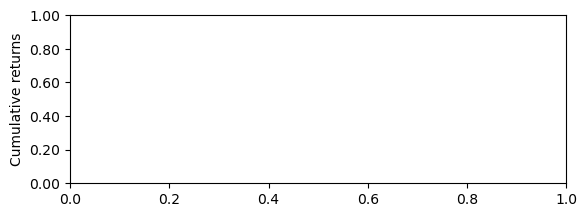

In [78]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(ret, ret_benchmark)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(ret)
plt.tight_layout()